<a href="https://colab.research.google.com/github/kingruss-afk/Data-Mining-CSC-587/blob/main/Lab%2015%20ICO%20Russell%20King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score

#Dataset creation with sklearn tools (make_blobs)

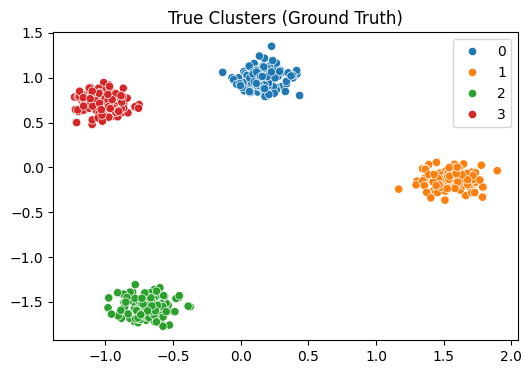

In [2]:
# Create blob-like data with clear clusters. Please note that these are perfect clusters with create.
#So, the clustering structure will be obvious to the algorithms

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the true clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.title("True Clusters (Ground Truth)")
plt.show()

#Using elbow method to determine the number of cluster

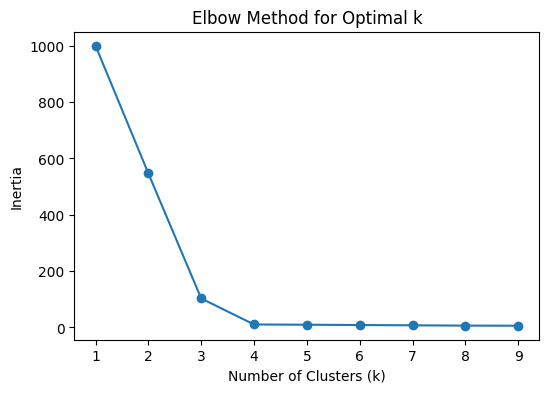

In [3]:
inertia = [] #Inertia is the sum of squared distances from each point to its assigned cluster center.
#inertia is a metric that measures how internally coherent the clusters are


K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#Apply both k-means and DBScan on the same data. Please note that DBSCAN doesn't require the number of clusters, but it asks epsilon and min_samples (min points)

In [4]:
# Best guess from elbow method (should be 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Let's visualize both clustering outputs

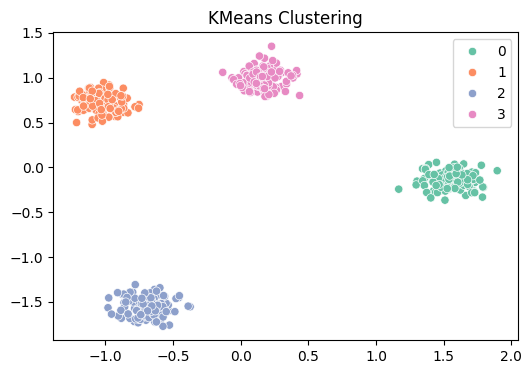

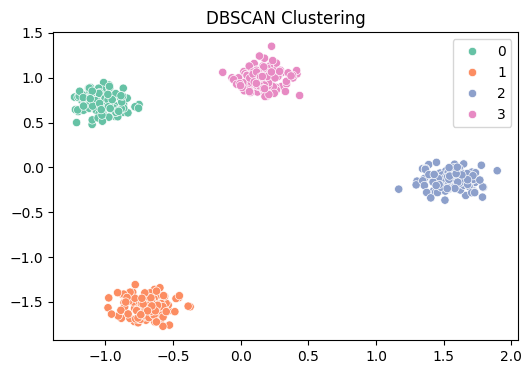

In [5]:
# Visualize KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

#Adjusted Rand Index calculations

In [6]:
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 1.0
Adjusted Rand Index (DBSCAN): 1.0


#Can you do the same experiment with iris data?

In [7]:
# import iris data
import pandas as pd
from sklearn.datasets import load_iris

In [8]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score

#Using Iris Dataset to create dataframe (iris)

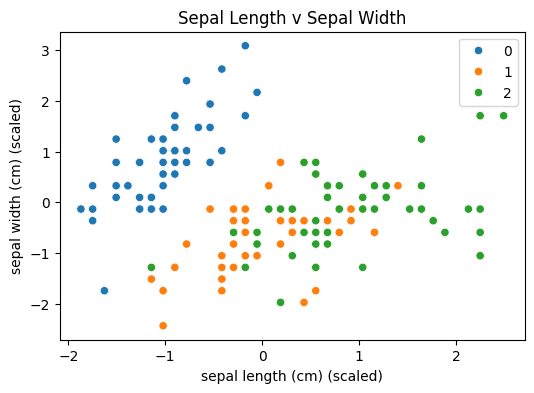

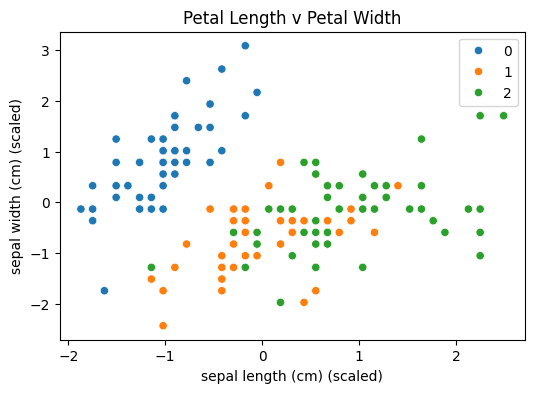

In [13]:
iris = load_iris() # Load the iris dataset

X = iris.data # Use the feature data from the loaded iris dataset
y_true = iris.target # Use the target labels as the ground truth

# Scale the features
scheduler = StandardScaler()
X_scaled = scheduler.fit_transform(X)

# Visualize the true clusters (sepal width vs length)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.xlabel(iris.feature_names[0] + ' (scaled)') # Labeling axes
plt.ylabel(iris.feature_names[1] + ' (scaled)')
plt.title("Sepal Length v Sepal Width")
plt.show()

# Visualize the true clusters (petal width vs length)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.xlabel(iris.feature_names[0] + ' (scaled)') # Labeling axes
plt.ylabel(iris.feature_names[1] + ' (scaled)')
plt.title("Petal Length v Petal Width")
plt.show()

#Using elbow method to determine the number of cluster

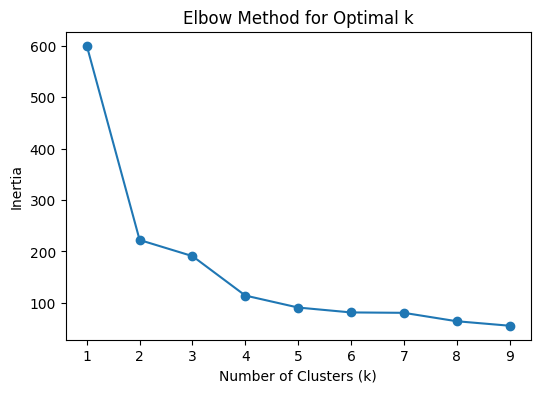

In [14]:
inertia = []

K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [32]:
# Best guess from elbow method (should be 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=0.75, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

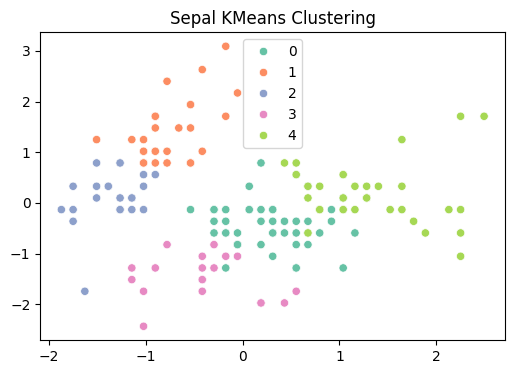

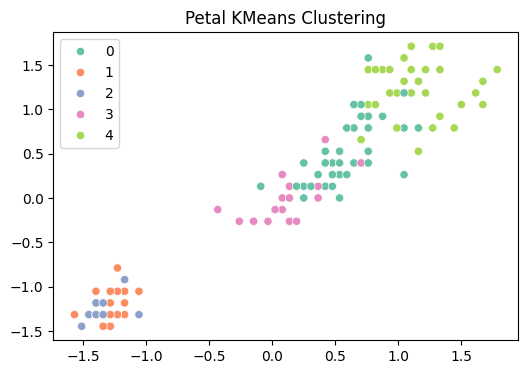

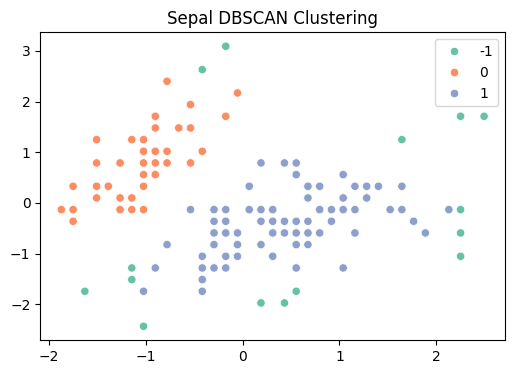

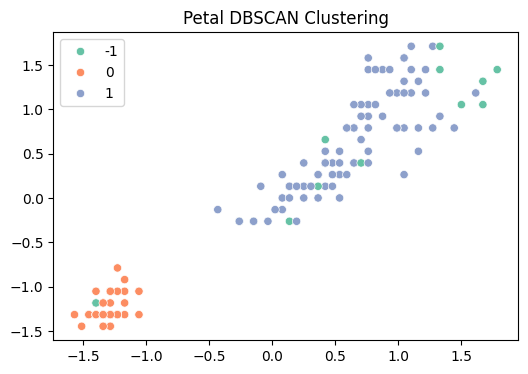

In [33]:
# Visualize KMeans (Sepal length v width)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("Sepal KMeans Clustering")
plt.show()

# Visualize KMeans (Petal Length v width)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=kmeans_labels, palette='Set2')
plt.title("Petal KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("Sepal DBSCAN Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=dbscan_labels, palette='Set2')
plt.title("Petal DBSCAN Clustering")
plt.show()

In [34]:
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 0.4385012977881501
Adjusted Rand Index (DBSCAN): 0.5022879703658126
